# Визуализация категориальных данных


https://pyprog.pro/

Разброс внутри категорий


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные о размере чаевых в ресторане

In [ ]:
tips = pd.read_csv('../input/seaborn-tips-dataset/tips.csv')
tips.head()

Первая задача, которую можно решить с помощью графика разброса - визуализировать совместное распределение двух величин, скажем, зависимость размера чаевых от общей стоимости заказа:

In [ ]:
sns.relplot(x='total_bill', y='tip', data=tips);

В большей мере, размер чаевых - это случайная величина, но чаевые могут дать как мужчины так и женщины, т.е. размер чаевых можно разделить на два подмножества:

In [ ]:
sns.relplot(x='total_bill',
            y='tip',
            col='sex',
            data=tips);

Вторая задача - визуализация разброса измеренных значений внутри каждой категории:

In [ ]:
sns.catplot(x='sex',
            y='tip',
            data=tips);

В принципе, мы могли бы построить точно такой же график и с помощью функции scatterplot()

In [ ]:
sns.scatterplot(x='sex',
                y='tip',
                data=tips);


Но обратите внимание, что на этом графике точки расположены вдоль линий и сильно перекрывают друг друга, что снижает информативность. А вот на графике, который мы построили с помощью catplot(), к точкам добавлено небольшое горизонтальное рассеяние, что бы снизить количество их наложений друг на друга. Таким образом, для визуализации разброса внутри категорий, лучше использовать catplot(). Например, вот так можно взглянуть как распределен размер чаевых в зависимости от дня недели:

In [ ]:
sns.catplot(x='day',
            y='tip',
            data=tips);

При этом функция catplot() так же позволяет выделять дополнительные подмножества, скажем, можно посмотреть, как на размер чаевых влияет не только пол человека, оплатившего заказ, но еще и время дня:

In [ ]:
sns.catplot(x='sex',
            y='tip',
            hue='time',
            data=tips);

# Распределение внутри категорий


График разброса по категориям удобен для небольших наборов данных, так как по мере увеличения количества точек они все равно начнут перекрывать друг друга и сливаться. Что бы преодолеть эти трудности, лучше воспользоваться графиками, которые сами содержат некоторую информацию о распределении внутри категорий. Один из таких графиков - это "ящик с усами" или boxplot. Его можно построить с помощью той же функции catplot с параметром kind, установленным в значение 'box'.


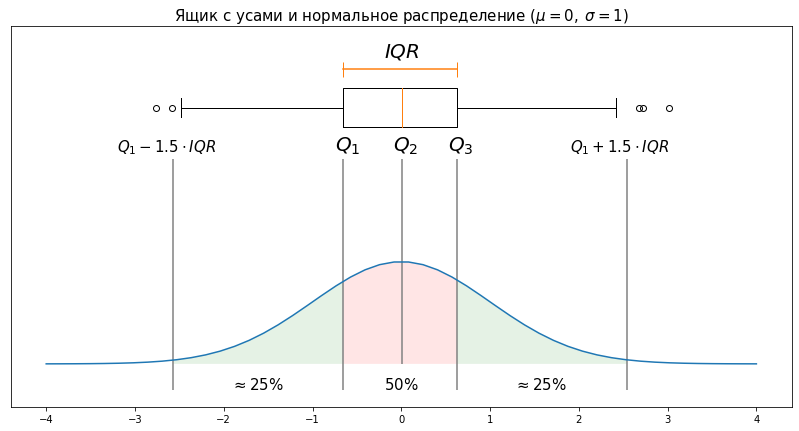

In [ ]:
sns.catplot(x='sex',
            y='tip',
            kind='box',
            data=tips);

На этом графике видно, что нижние квартили размера чаевых, которые оставляли мужчины и женщины одинаковы, однако в половине случаев, мужчины оставляют немного бóльшие чаевые чем женщины. Тем не менее, у мужчин больше "верхних" выбросов... наверняка тут есть какая-нибудь культурно-гендерная подоплека (согласитесь - это любопытно).

С помощью параметра hue мы можем выделить в данных некоторые подмножества:

In [ ]:
sns.catplot(x='day',
            y='tip',
            hue='time',
            kind='box',
            data=tips);

Если наблюдений очень много, то лучше воспользоваться boxenplot:

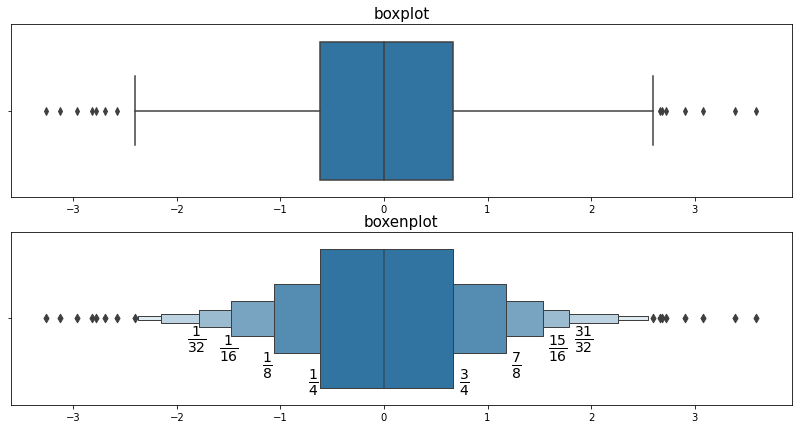

boxenplot позволяет получить больше информации о распределении значений внутри категорий. Чем больше значений - тем больше прямоугольников, а это значит, что можно оценивать "хвосты" распределений.

In [ ]:
sns.catplot(x='day',
            y='tip',
            kind='boxen',
            data=tips);

# Столбчатые диаграммы


Стобчатые диаграммы тоже могут быть очень удобны. В Seaborn функция barplot() по умолчанию отображает среднее значение величины внутри каждой категории и отображает ее доверительный интервал:

In [ ]:
sns.catplot(x='day',
            y='tip',
            kind='bar',
            data=tips);

С помощью параметра hue можно выделять подмножества в категориях:



In [ ]:
sns.catplot(x='day',
            y='tip',
            hue='time',
            kind='bar',
            data=tips);
